## Especialização Inteligência Artificial Aplicada
### Disciplina Visão Computacional - Trabalho Classificação de Imagens - Base de imagens dos simpsons
### Aluno: Jean Carlos Rodrigues



#### Importando bibliotecas utilizadas


Importando bibliotecas do sistema e de regex utilizadas para abrir e processar o caminho e a classe das imagens e bibliotecas do opencv e do scikitlearn para tratamento e classificacao:

In [23]:

import os
import re

import cv2

#from matplotlib import pyplot as plt
#from mpl_toolkits import mplot3d
import numpy as np

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


#### Funções utilitárias e definições dos caminhos das imagens

Função para extrair a classe da imagem do nome do arquivo:


In [24]:
def process_image_class(image_name):
    name = image_name.split('.')[0]    
    return re.sub(r'[0-9]+','',name)

Importacao das imagens e processamento das classes: 

In [25]:

path = "/home/jean/git/ia09/trabalho_visao_computacional/Treinamento/"
path_test = "/home/jean/git/ia09/trabalho_visao_computacional/Teste/"

files_train = os.listdir(path)
files_test = os.listdir(path_test)

classes_train = [ process_image_class(f) for f in files_train ]

classes_test = [ process_image_class(f) for f in files_test ]

#### Definição da função de treino e teste 

Antes de realizar o processamento das imagens temos que criar uma funcao para realizar o teste e treinamento dos classficadores. Vamos utilizar alguns algortimos mostrados durante outras disciplinas da especialização: Naive Bayes, SVM, Random Forest e KNN

A nossa funcão de classificação irá receber como parâmetro o classificador desejado e quatro listas contendo as características extraídas e classes das imagens de treino e teste: 

In [111]:

def train_and_test( classifier, train_images, train_cls, test_images, test_cls):
    
    classifier.fit(train_images,train_cls)
    predicted_cls = classifier.predict(test_images)

    #acuracia do classificador
    accuracy = metrics.accuracy_score( test_cls , predicted_cls ) 
    
    #nomes dos arquivos das imagens classificadas incorretamente
    classifier_errors = [ files_test[indx] for indx,x in enumerate(predicted_cls) for indy,y in enumerate(test_cls) if indx==indy and x != y]
    classifier_errors.sort()
    return accuracy, classifier_errors
    
    

#### Definição dos classificadores

Agora precisamos criar uma função que instância os nossos classificadores e chama nossa função de treino e teste

In [109]:
seed = 9

def run_classifiers(train_images, train_cls, test_images, test_cls):
    
    classifier_svm = SVC(gamma='scale',random_state=seed)
    acc_svm , errs_svm = train_and_test(classifier_svm, train_images, train_cls, test_images, test_cls)
    
    classifier_rf = RandomForestClassifier(n_estimators=10,random_state=seed)
    acc_rf , errs_rf = train_and_test(classifier_rf, train_images, train_cls, test_images, test_cls)
    
    classifier_nb = GaussianNB()
    acc_nb , errs_nb = train_and_test(classifier_nb, train_images, train_cls, test_images, test_cls)
    
    classifier_knn = KNeighborsClassifier()
    acc_knn , errs_knn = train_and_test(classifier_knn, train_images, train_cls, test_images, test_cls)
    
    
    acc_svm = round(acc_svm, 2)
    acc_rf = round(acc_rf, 2)
    acc_knn = round(acc_knn, 2)
    acc_nb = round(acc_nb, 2)
    
    print("Acurácia dos classificadores:\n")
    
    print("SVM: ")
    print( str(acc_svm) )
    print( str(len(errs_svm)) + " erros: " + str(errs_svm) + "\n")
    
    print("RandomForest: ")
    print( str(acc_rf) )
    print( str(len(errs_rf)) + " erros: " + str(errs_rf) + "\n")
    
    print("GaussianNB: ")
    print( str(acc_nb) )
    print( str(len(errs_nb)) + " erros: " + str(errs_nb) + "\n")
    
    print("KNN: ")
    print( str(acc_knn) )
    print( str(len(errs_knn)) + " erros: " + str(errs_knn) + "\n")
    
    print("Imagens classificadas com erro por todos os classicadores; ")
    print( [ s for s in errs_svm for r in errs_rf for n in errs_nb for k in errs_knn if s==r and r==n and n==k ])
    
    

#### Processamento das imagens

A primeira abordagem utilizada na classificação foi utilizar o histograma das imagens utilizando um dos exemplos vistos em sala de aula:



In [35]:
def process_image(path):
    
    image = cv2.imread(path+f)
    hist  = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])        
    cv2.normalize(hist, hist)        
    h = hist.flatten() 
    
    img = cv2.imread(path)
#    image = cv2.resize(image,(400,300))
    hist  = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])        
    cv2.normalize(hist, hist)        
#    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    h = hist.flatten()    
    return h

    

In [112]:
histogramas_train = []
histogramas_test = []

for file in files_train:    
    histogramas_train.append( process_image(path+file) )

for file in files_test:    
    histogramas_test.append( process_image(path_test+file) )  

run_classifiers(histogramas_train, classes_train, histogramas_test, classes_test)    



Acurácia dos classificadores:

SVM: 
0.71
16 erros: ['bart085.bmp', 'bart089.bmp', 'bart091.bmp', 'bart092.bmp', 'bart094.bmp', 'bart105.bmp', 'bart109.bmp', 'homer069.bmp', 'homer072.bmp', 'homer075.bmp', 'homer078.bmp', 'homer079.bmp', 'homer080.bmp', 'homer082.bmp', 'homer084.bmp', 'homer087.bmp']

RandomForest: 
0.93
4 erros: ['homer076.bmp', 'homer078.bmp', 'homer083.bmp', 'homer085.bmp']

GaussianNB: 
0.64
20 erros: ['bart084.bmp', 'bart085.bmp', 'bart092.bmp', 'bart093.bmp', 'bart094.bmp', 'bart097.bmp', 'bart098.bmp', 'bart106.bmp', 'homer068.bmp', 'homer069.bmp', 'homer071.bmp', 'homer074.bmp', 'homer075.bmp', 'homer076.bmp', 'homer078.bmp', 'homer080.bmp', 'homer082.bmp', 'homer084.bmp', 'homer085.bmp', 'homer086.bmp']

KNN: 
0.84
9 erros: ['bart081.bmp', 'bart084.bmp', 'bart105.bmp', 'bart106.bmp', 'bart109.bmp', 'homer066.bmp', 'homer070.bmp', 'homer076.bmp', 'homer085.bmp']

Imagens classificadas com erro por todos os classicadores; 
[]


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb81d19cd90> (for post_execute):


KeyboardInterrupt: 

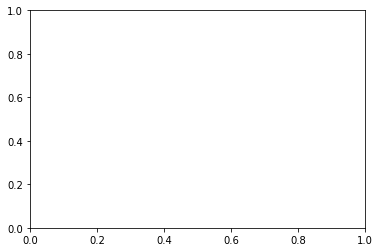

In [104]:




image = cv2.imread(path+files_train[0])
h = cv2.calcHist([image], [0,1,2], None, [8,8,8], [0, 256,0, 256,0, 256])

(b,g,r) = cv2.split(image)

plt.hist(b, bins=256, range=(0, 256), fc='k', ec='k')

feature = cv2.HuMoments(cv2.moments(b)).flatten()
print(feature)

feature = cv2.HuMoments(cv2.moments(g)).flatten()
print(feature)

feature = cv2.HuMoments(cv2.moments(r)).flatten()
print(feature)




In [99]:
import numpy as np
import os 
import cv2
import re

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

path = "/home/jean/git/ia09/trabalho_visao_computacional/Treinamento/"
path_test = "/home/jean/git/ia09/trabalho_visao_computacional/Teste/"


def process_image_class(image_name):
    name = image_name.split('.')[0]    
    return re.sub(r'[0-9]+','',name)
  
def process_image(path):
    image = cv2.imread(path)
    
#    image = cv2.resize(image,(400,300))
    
    hist  = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])        
    cv2.normalize(hist, hist)        
    
#    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    h = hist.flatten()    

    return h
    

hists_train = []
hists_cls_train = []

hists_test = []
hists_cls_test = []

files_train = os.listdir(path)
files_test = os.listdir(path_test)

for file in files_train:    
    hists_train.append( process_image(path+file) )
    hists_cls_train.append( process_image_class(file) )
    

for file in files_test:    
    hists_test.append( process_image(path_test+file) )    
    hists_cls_test.append( process_image_class(file) )



classifier_svm = SVC(random_state=9)
classifier_svm.fit(hists_train,hists_cls_train)
predicted_cls = classifier_svm.predict(hists_test)

print("acuracia svm: " )
print(metrics.accuracy_score( hists_cls_test , predicted_cls ) )

print("imagens classificadas incorretamente ")
print( [ files_test[indx] for indx,x in enumerate(predicted_cls) for indy,y in enumerate(hists_cls_test) if indx==indy and x != y] )

classifier_rf = RandomForestClassifier(random_state=9)
classifier_rf.fit(hists_train,hists_cls_train)
predicted_cls = classifier_rf.predict(hists_test)

print("acuracia ramdon forest: " )
print(metrics.accuracy_score( hists_cls_test , predicted_cls ) )

print("imagens classificadas incorretamente")
print( [ files_test[indx] for indx,x in enumerate(predicted_cls) for indy,y in enumerate(hists_cls_test) if indx==indy and x != y] )

acuracia svm: 
0.5818181818181818
imagens classificadas incorretamente 
['homer073.bmp', 'homer076.bmp', 'homer078.bmp', 'homer069.bmp', 'homer072.bmp', 'homer066.bmp', 'homer079.bmp', 'homer071.bmp', 'homer085.bmp', 'homer074.bmp', 'homer086.bmp', 'homer080.bmp', 'homer081.bmp', 'homer087.bmp', 'homer082.bmp', 'homer070.bmp', 'homer084.bmp', 'homer068.bmp', 'homer083.bmp', 'homer064.bmp', 'homer077.bmp', 'homer065.bmp', 'homer075.bmp']
acuracia ramdon forest: 
0.9272727272727272
imagens classificadas incorretamente
['homer076.bmp', 'homer078.bmp', 'homer085.bmp', 'homer083.bmp']


/home/jean/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jean/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
